In [13]:
if 'google.colab' in str(get_ipython()):
    import sys
    from google.colab import drive, output
    drive.mount('/content/drive')
    !pip install torchaudio
    !pip install wandb --upgrade
    # !wandb login
    !pip install umap-learn
    !pip install umap-learn[plot]
    !pip install holoviews
    !pip install -U ipykernel
    !pip install joypy
    # !pip install umap-learn
    output.clear()
    print("Running on colab")
    %load_ext autoreload
    %autoreload 1
    %cd '/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project'
    #sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/data')
    #sys.path.append('/content/drive/MyDrive/Deep Learning/AutoEncoders/Project/VQVAE_Working/models')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Dataloader')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Models')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Modules')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Results/Results')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Results/Figures')
    sys.path.append('/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project/Clustering_Result')
elif "zmqshell" in str(get_ipython()):
    print("Running on MIRP")
    root = "/home/mirp_ai/Documents/Daniel_Nieto/PhD/AutoEncoders_Ecoacoustics/Jaguas"
    root_path = "/media/mirp_ai/Seagate Desktop Drive/Jaguas_2018"
else:
    import pathlib
    temp = pathlib.PosixPath
    pathlib.PosixPath = pathlib.WindowsPath
    print("Running local")

Running on MIRP


In [14]:
import numpy as np
import torchaudio
import torch
import os, sys
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

%autoreload 1
# % cd f"{root}/Jaguas/vggish"
# folders = os.listdir(root_path)
# files=[]
# for i in range(len(folders)):
#     path_aux = "{}/{}".format(root_path, folders[i])
#     files += list(Path(path_aux).rglob("*.{}".format("wav")))
# file = str(files[16])

UsageError: Line magic function `%autoreload` not found.


In [24]:
def find_pickle_filenames( path_to_dir, suffix=".pickle" ):
    filenames = os.listdir(path_to_dir)
    return sorted([ filename for filename in filenames if filename.endswith( suffix ) ])

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return sorted([ filename for filename in filenames if filename.endswith( suffix ) ])

def find_wav_filenames( path_to_dir, suffix=".wav" ):
    filenames = os.listdir(path_to_dir)
    return sorted([ filename for filename in filenames if filename.endswith( suffix ) ])

folders = os.listdir(root_path)

In [30]:
root_audios = f"{root}/Complementary_Files/Audios_Jaguas/Audios_Jaguas.csv"
df_audios = pd.read_csv(root_audios)

In [41]:
root_path+"/"+folders[0]+"/"+df_audios.loc[0, "Filename"]

'/media/mirp_ai/Seagate Desktop Drive/Jaguas_2018/G03_m/G03_20180511_120000.wav'

In [ ]:
a = pd.read_pickle(files[0])
a["Data"].shape

In [43]:
embeddings.shape

torch.Size([62, 128])

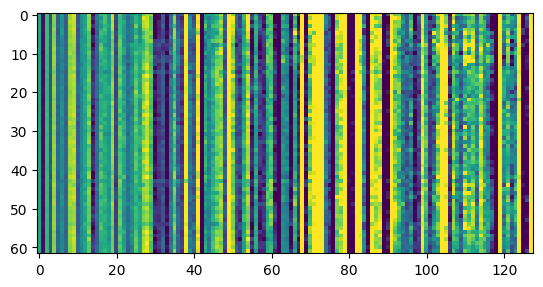

In [42]:
!pip install torchvggish==0.1
from torchvggish import vggish, vggish_input

# Initialise model and download weights
embedding_model = vggish()
embedding_model.eval()

example = vggish_input.wavfile_to_examples(root_path+"/"+folders[0]+"/"+df_audios.loc[0, "Filename"])
embeddings = embedding_model.forward(example)
embeddings.detach().numpy().shape
plt.imshow(embeddings.detach().numpy())

In [ ]:
from torch.utils.data import DataLoader
root = "/content/drive/MyDrive/PhD_Thesis_Experiments/DeepLearning/AutoEncoders/Project"
dataset_test = torch.load(f'{root}/temporal/dataset_test_ae_jaguas_new.pth')
dataset_train = torch.load(f'{root}/temporal/dataset_train_ae_jaguas_new.pth')
training_loader = DataLoader(dataset_train, batch_size=1)
test_loader = DataLoader(dataset_test, batch_size=1)
iterator = iter(training_loader)

training_recorder_list = []
training_hour_list = []
training_minute_list = []
delete_samples = []

In [ ]:
a = np.ones([1,20])
b = np.zeros([1,4])
c =np.append(a,b, axis=1)
c

In [ ]:
def fileToRecord(file, audio_lenght=12, resampling=22050, original_length=60):
    record, sr = torchaudio.load(file)
    audio_len = audio_lenght*resampling
    record = torch.mean(record, dim=0, keepdim=True)
    record = torchaudio.transforms.Resample(sr, resampling)(record)
    missing_padding = resampling * original_length - record.shape[1]
    padding = torch.zeros([1, missing_padding])
    record = torch.cat((record, padding), axis=1)
    print(record.shape[1]/resampling, missing_padding)
    record = record[:, :audio_len*(record.shape[1] // audio_len)]
    record = torch.reshape(record, (record.shape[1] // audio_len, audio_len))
    print(record.shape)
    record = record[0]
    return record
    

In [ ]:
record.shape

In [ ]:
record = fileToRecord(file)

In [ ]:
(b==record).all()

In [ ]:
iterator = iter(training_loader)
a,b,c = next(iterator)
a,b,c = next(iterator)
a,b,c = next(iterator)
a,b,c = next(iterator)

In [ ]:
for id, item in enumerate(dataset_train):
    index = training_loader.dataset.indices[id]
    file = str(files[index])
    record = fileToRecord(file)


    print(item.index)

In [ ]:
training_loader.dataset.indices

In [ ]:
for id, item in enumerate(dataset_train.dataset.):
    if (id+1)% 5 == 0:
        print("entro")
        break
    if id% 500 == 0:
        print(f"id: {id + 1} of {len(dataset_train)}")
    try:
        spec, wav, label = next(iterator)
    except:
        print(f"iterator broken in index {id}")
        continue
    wav = wav.unsqueeze(0)
    with torch.no_grad():
        codes = model.encoder(wav)
    print(codes.shape)
    encodings = torch.reshape(codes,(codes.shape[0], codes.shape[1]*codes.shape[2]))
    print(encodings.shape)
    training_samples_list_torch[id] = encodings[0]
    training_recorder_list.append(label["recorder"])
    training_hour_list.append(label["hour"])
    training_minute_list.append(label["minute"])

print(f"------------------------------------\n{id}\nProcess finished\nSaving data\n------------------------------------")
torch.save(training_samples_list_torch, "training_samples_list_torch_vggish_feats.pth")
torch.save(training_recorder_list, "training_recorder_list_vggish_feats.pth")
torch.save(training_hour_list, "training_hour_list_vggish_feats.pth")
torch.save(training_minute_list, "training_minute_list_vggish_feats.pth")
training_labels_list = {"recorder": training_recorder_list, "hour": training_hour_list, "minute": training_minute_list}
torch.save(training_labels_list, "training_labels_list_vggish_feats.pth")